In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [250]:
data_set = pd.read_excel('set.xlsx',index_col=0)

In [251]:
data_set_eps = pd.read_excel('set_eps.xlsx',index_col=0)

In [252]:
data_gdpq = pd.read_excel('gdpq.xlsx',engine= 'openpyxl',index_col=0)

In [253]:
data_set

,Prior,Open,High,Low,Close,PE
Date,,,,,,
2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81
...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89


In [254]:
data_set_eps

,Prior,Open,High,Low,Close,PE,EPS
Date,,,,,,,
2021-11-03,1617.89,1620.90,1623.08,1607.72,1611.92,19.3909,83.1235
2021-11-02,1613.78,1616.86,1621.69,1608.64,1617.89,19.4637,83.1246
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,19.4140,83.1221
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,19.5307,83.1111
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,19.5438,83.6187
...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6940
NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6926
NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6938


In [255]:
data_gdpq

,GDP
Date,
2016-03-31,3597737000000
2016-06-30,3557050000000
2016-09-30,3628315000000
2016-12-31,3807235000000
2017-03-31,3830606000000
2017-06-30,3753348000000
2017-09-30,3854593000000
2017-12-31,4050117000000
2018-03-31,4051915000000


In [256]:
min_date = data_set_eps.index.min()
max_date = data_set_eps.index.max()
date_range = (min_date, max_date)

In [257]:
date_range

(Timestamp('2016-01-04 00:00:00'), Timestamp('2021-11-03 00:00:00'))

In [258]:
data_set_eps_subset = data_set_eps.loc[data_set.index, ["PE", "EPS"]]

df1 = pd.merge(data_set, data_set_eps_subset, how="left", left_index=True, right_index=True)

In [259]:
data_set_eps_subset

,PE,EPS
Date,,
2016-01-04,17.3305,72.2368
2016-01-05,17.1919,72.2431
2016-01-06,17.2866,72.2438
2016-01-07,16.8012,72.2363
2016-01-08,17.0010,72.2296
...,...,...
2021-10-28,19.5438,83.6187
2021-10-29,19.5307,83.1111
2021-11-01,19.4140,83.1221


In [260]:
df1

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS
Date,,,,,,,,
2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12,17.3305,72.2368
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99,17.1919,72.2431
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10,17.2866,72.2438
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46,16.8012,72.2363
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81,17.0010,72.2296
...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,19.5438,83.6187
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,19.5307,83.1111
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,19.4140,83.1221


In [261]:
df1

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS
Date,,,,,,,,
2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12,17.3305,72.2368
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99,17.1919,72.2431
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10,17.2866,72.2438
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46,16.8012,72.2363
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81,17.0010,72.2296
...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,19.5438,83.6187
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,19.5307,83.1111
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,19.4140,83.1221


In [262]:
data_gdpq.index.year


Int64Index([2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018,
            2018, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2021, 2021],
           dtype='int64', name='Date')

In [263]:
data_gdpq.groupby(data_gdpq.index.year)['GDP'].mean()

Date
2016    3.647584e+12
2017    3.872166e+12
2018    4.092176e+12
2019    4.224522e+12
2020    3.924572e+12
2021    3.997128e+12
Name: GDP, dtype: float64

In [264]:
gdp_yearly = data_gdpq.groupby(data_gdpq.index.year)['GDP'].mean()


In [265]:
for i in range(2016,2022):
    df1.loc[str(i),'gdp'] = gdp_yearly.loc[i]

In [266]:
df1

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp
Date,,,,,,,,,
2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12,17.3305,72.2368,3.647584e+12
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99,17.1919,72.2431,3.647584e+12
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10,17.2866,72.2438,3.647584e+12
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46,16.8012,72.2363,3.647584e+12
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81,17.0010,72.2296,3.647584e+12
...,...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,19.5438,83.6187,3.997128e+12
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,19.5307,83.1111,3.997128e+12
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,19.4140,83.1221,3.997128e+12


In [267]:
df1['Return_shift'] = df1.Close.pct_change()

In [268]:
df1

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift
Date,,,,,,,,,,
2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12,17.3305,72.2368,3.647584e+12,NaN
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99,17.1919,72.2431,3.647584e+12,-0.007970
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10,17.2866,72.2438,3.647584e+12,0.005346
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46,16.8012,72.2363,3.647584e+12,-0.027944
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81,17.0010,72.2296,3.647584e+12,0.015798
...,...,...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,19.5438,83.6187,3.997128e+12,-0.002028
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,19.5307,83.1111,3.997128e+12,-0.000542
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,19.4140,83.1221,3.997128e+12,-0.005944


In [269]:
df1.dropna(inplace=True)

In [270]:
df1

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift
Date,,,,,,,,,,
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99,17.1919,72.2431,3.647584e+12,-0.007970
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10,17.2866,72.2438,3.647584e+12,0.005346
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46,16.8012,72.2363,3.647584e+12,-0.027944
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81,17.0010,72.2296,3.647584e+12,0.015798
2016-01-11,1244.18,1233.80,1235.18,1220.96,1234.50,21.63,16.8695,72.2242,3.647584e+12,-0.007780
...,...,...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,19.5438,83.6187,3.997128e+12,-0.002028
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,19.5307,83.1111,3.997128e+12,-0.000542
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,19.4140,83.1221,3.997128e+12,-0.005944


In [325]:
df1.loc[(df1.EPS>70)& (df1.EPS<80)]

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift,PE_Label
Date,,,,,,,,,,,
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99,17.1919,72.2431,3.647584e+12,-0.007970,1
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10,17.2866,72.2438,3.647584e+12,0.005346,1
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46,16.8012,72.2363,3.647584e+12,-0.027944,1
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81,17.0010,72.2296,3.647584e+12,0.015798,1
2016-01-11,1244.18,1233.80,1235.18,1220.96,1234.50,21.63,16.8695,72.2242,3.647584e+12,-0.007780,1
...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,1406.57,1407.66,1410.04,1399.36,1400.50,21.16,19.3878,74.2615,3.647584e+12,-0.004315,1
2016-05-19,1400.50,1399.39,1400.97,1384.12,1385.86,20.94,19.1851,74.2568,3.647584e+12,-0.010453,1
2016-05-23,1385.86,1387.81,1388.88,1377.65,1381.69,20.88,19.1272,74.2602,3.647584e+12,-0.003009,1


In [333]:
df1.loc[ (df1.EPS>35)&(df1.EPS<40)]

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift,PE_Label
Date,,,,,,,,,,,
2020-12-03,1417.95,1424.31,1439.22,1420.69,1438.32,28.49,26.2152,38.9297,3.924572e+12,0.014366,2
2020-12-04,1438.32,1439.14,1454.94,1439.14,1449.83,28.73,26.4263,38.9327,3.924572e+12,0.008002,2
2020-12-08,1449.83,1447.71,1484.73,1442.65,1478.92,29.34,26.9521,38.9373,3.924572e+12,0.020064,2
2020-12-09,1478.92,1491.67,1503.89,1474.83,1482.67,29.41,27.0420,38.9369,3.924572e+12,0.002536,2
2020-12-14,1482.67,1490.79,1495.18,1471.56,1476.13,29.28,26.9259,38.9370,3.924572e+12,-0.004411,2
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05,1534.11,1530.05,1553.92,1529.83,1544.11,40.32,39.5819,39.0209,3.997128e+12,0.006518,6
2021-03-08,1544.11,1558.79,1562.56,1540.64,1543.76,40.29,39.5730,39.0214,3.997128e+12,-0.000227,6
2021-03-09,1543.76,1551.57,1554.96,1537.23,1550.59,40.44,39.7479,39.0213,3.997128e+12,0.004424,6


In [338]:
df1.loc[ (df1.EPS>100)]

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift,PE_Label
Date,,,,,,,,,,,
2018-04-02,1776.26,1775.24,1783.73,1771.58,1782.28,18.35,17.9799,101.0242,4.092176e+12,0.003389,1
2018-04-03,1782.28,1774.45,1779.04,1764.18,1765.24,18.17,17.8016,101.0231,4.092176e+12,-0.009561,1
2018-04-04,1765.24,1766.67,1771.58,1724.90,1724.98,17.75,17.3944,101.0234,4.092176e+12,-0.022807,1
2018-04-05,1724.98,1735.58,1740.84,1724.88,1739.92,17.90,17.5470,101.0272,4.092176e+12,0.008661,1
2018-04-09,1739.92,1736.54,1752.91,1735.38,1751.27,18.03,17.6620,101.0266,4.092176e+12,0.006523,1
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-10,1722.48,1718.40,1719.03,1705.20,1705.96,17.32,16.9411,105.4328,4.092176e+12,-0.009591,1
2018-08-21,1701.42,1703.79,1707.63,1688.59,1694.63,16.83,16.8285,100.6324,4.092176e+12,-0.003991,1
2018-08-22,1694.63,1696.96,1705.91,1695.34,1698.30,16.89,16.8666,100.6112,4.092176e+12,0.002166,1


In [294]:
def pe(pe):
    if pe <=20:
        return 1
    elif (pe>20)&(pe<=28):
        return 2
    elif (pe>28)&(pe<=30):
        return 3
    elif (pe > 30) & (pe <= 34):
        return 4
    elif (pe > 34) & (pe <= 38):
        return 5
    elif (pe > 38) & (pe <= 42):
        return 6
    elif pe > 42:
        return 7

In [355]:
def eps(eps):
    if eps <=40:
        return 1
    elif (eps>40)&(eps<=50):
        return 2
    elif (eps>50)&(eps<=60):
        return 3
    elif (eps > 60) & (eps <= 70):
        return 4
    elif (eps > 70) & (eps <= 80):
        return 5
    elif (eps > 80) & (eps <= 90):
        return 6
    elif (eps > 90) & (eps <= 100):
        return 7
    elif eps > 100 :
        return 8

In [384]:
def gdp(gdp):
    if gdp <=3.750000e+12:
        return 1
    elif (gdp>3.750000e+12)&(gdp<=4.000000e+12):
        return 2
    elif (gdp>4.000000e+12)&(gdp<=4.250000e+12):
        return 3
    elif eps > 4.250000e+12 :
        return 4
    
    

In [356]:
df1['PE_Label'] = df1['PE_y'].apply(pe)

In [357]:
df1['EPS_Label'] = df1['EPS'].apply(eps)

In [385]:
df1['GDP_Label'] = df1['gdp'].apply(gdp)

In [386]:
df1

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift,PE_Label,EPS_Label,GDP_Label
Date,,,,,,,,,,,,,
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99,17.1919,72.2431,3.647584e+12,-0.007970,1,5,1
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10,17.2866,72.2438,3.647584e+12,0.005346,1,5,1
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46,16.8012,72.2363,3.647584e+12,-0.027944,1,5,1
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81,17.0010,72.2296,3.647584e+12,0.015798,1,5,1
2016-01-11,1244.18,1233.80,1235.18,1220.96,1234.50,21.63,16.8695,72.2242,3.647584e+12,-0.007780,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,19.5438,83.6187,3.997128e+12,-0.002028,1,6,2
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,19.5307,83.1111,3.997128e+12,-0.000542,1,6,2
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,19.4140,83.1221,3.997128e+12,-0.005944,1,6,2


In [359]:
df1.loc[df1['EPS_Label'].isnull()]

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift,PE_Label,EPS_Label
Date,,,,,,,,,,,,


In [387]:
df1.loc[df1['GDP_Label'].isnull()]

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift,PE_Label,EPS_Label,GDP_Label
Date,,,,,,,,,,,,,


In [390]:
X = df1[['EPS','PE_y','gdp','EPS_Label', 'PE_Label','GDP_Label']]
y = df1['Return_shift']

In [391]:
X_train = X.iloc[:1000]
y_train = y.iloc[:1000]
X_test = X.iloc[1000:1200]
y_test = y.iloc[1000:1200]

In [392]:
X_train

,EPS,PE_y,gdp,EPS_Label,PE_Label,GDP_Label
Date,,,,,,
2016-01-05,72.2431,17.1919,3.647584e+12,5,1,1
2016-01-06,72.2438,17.2866,3.647584e+12,5,1,1
2016-01-07,72.2363,16.8012,3.647584e+12,5,1,1
2016-01-08,72.2296,17.0010,3.647584e+12,5,1,1
2016-01-11,72.2242,16.8695,3.647584e+12,5,1,1
...,...,...,...,...,...,...
2020-01-29,87.4341,17.4639,3.924572e+12,6,1,2
2020-01-30,87.4127,17.4568,3.924572e+12,6,1,2
2020-01-31,87.4291,17.3440,3.924572e+12,6,1,2


In [393]:
y_train

Date
2016-01-05   -0.007970
2016-01-06    0.005346
2016-01-07   -0.027944
2016-01-08    0.015798
2016-01-11   -0.007780
                ...   
2020-01-29    0.007487
2020-01-30   -0.000394
2020-01-31   -0.006463
2020-02-03   -0.011941
2020-02-04    0.015588
Name: Return_shift, Length: 1000, dtype: float64

In [394]:
X_test

,EPS,PE_y,gdp,EPS_Label,PE_Label,GDP_Label
Date,,,,,,
2020-02-05,87.3689,17.5751,3.924572e+12,6,1,2
2020-02-06,87.3775,17.5939,3.924572e+12,6,1,2
2020-02-07,87.3785,17.5876,3.924572e+12,6,1,2
2020-02-11,87.3733,17.4579,3.924572e+12,6,1,2
2020-02-12,87.3735,17.6405,3.924572e+12,6,1,2
...,...,...,...,...,...,...
2020-11-24,54.8500,25.5605,3.924572e+12,3,2,2
2020-11-25,54.8633,25.8183,3.924572e+12,3,2,2
2020-11-26,55.5504,26.1422,3.924572e+12,3,2,2


In [424]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.model_selection import cross_val_score



model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Score = ', metrics.r2_score(y_test,y_pred))

m = model.coef_
print("coef = ",m)
b = model.intercept_
print("intercept = ",b)






print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Score =  0.016679949410685402
coef =  [ 4.68128493e-05  4.35681735e-04  3.02324355e-15  2.79260864e-05
 -1.35296661e-03 -1.46159773e-03]
intercept =  -0.019300039650165336
MAE =  0.012205326313264547
MSE =  0.0003814982502499546
RMSE =  0.01953198019274939


In [396]:
df_report = pd.DataFrame({'Actual': y_test, 'Predict':y_pred})


In [397]:
df_report

,Actual,Predict
Date,,
2020-02-05,0.009714,0.000203
2020-02-06,0.001076,0.000212
2020-02-07,-0.000358,0.000209
2020-02-11,-0.007367,0.000153
2020-02-12,0.010440,0.000232
...,...,...
2020-11-24,-0.013235,0.000723
2020-11-25,0.010053,0.000836
2020-11-26,0.012601,0.001010


<AxesSubplot:xlabel='Date'>

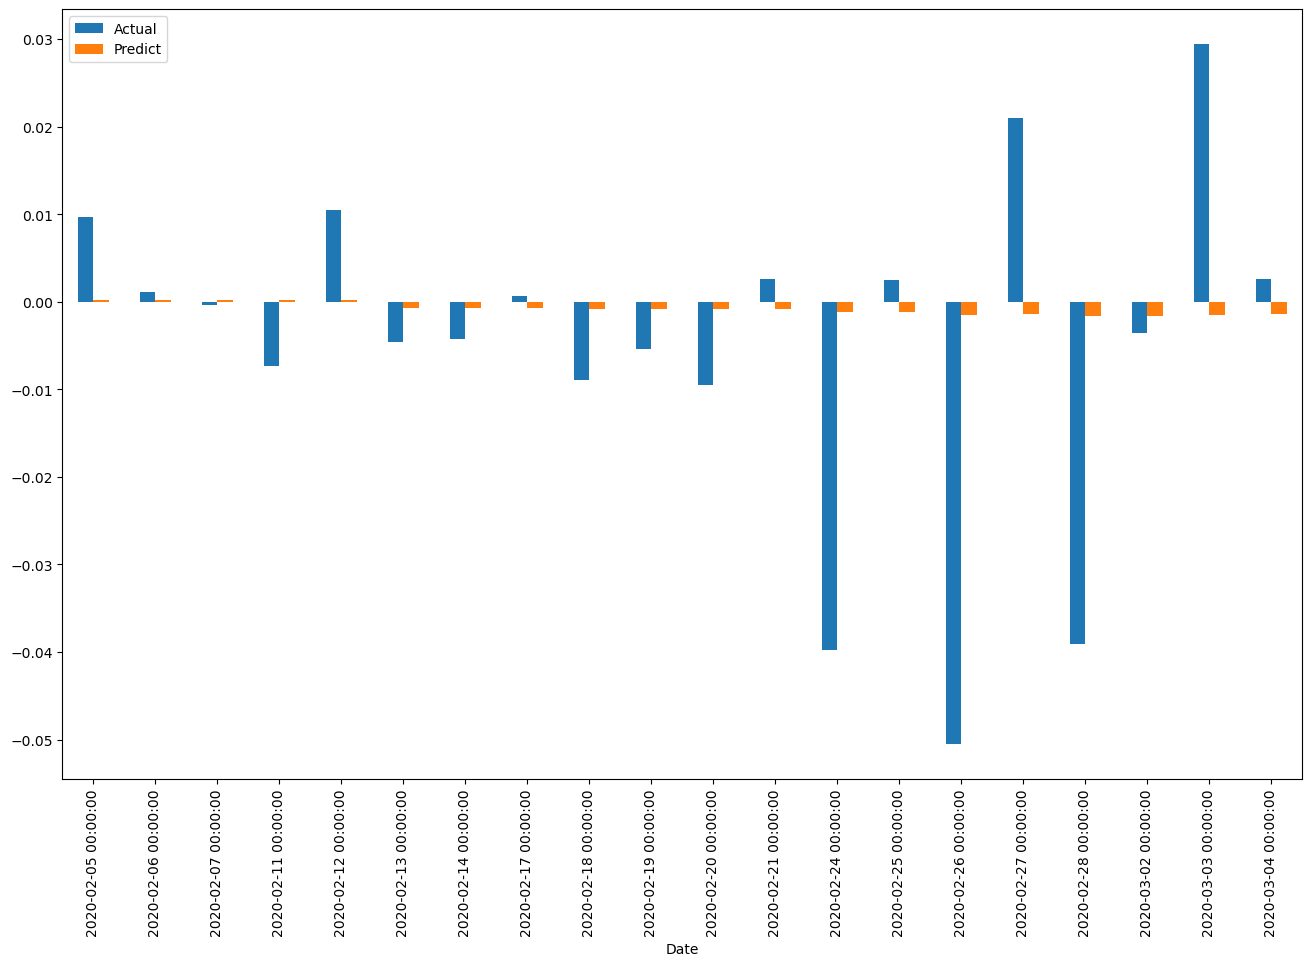

In [398]:
df_report_example = df_report.head(20)
df_report_example.plot(kind='bar',figsize=(16,10))

<AxesSubplot:xlabel='Date'>

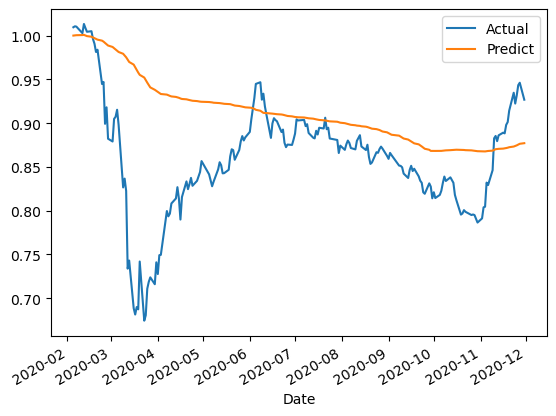

In [427]:
(df_report+1).cumprod().plot()

# test with data split

In [401]:
X_live = df1.iloc[1200:]

In [402]:
X_live

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift,PE_Label,EPS_Label,GDP_Label
Date,,,,,,,,,,,,,
2020-12-01,1408.31,1419.28,1430.03,1416.39,1420.87,28.11,25.9028,55.4349,3.924572e+12,0.008918,2,3,2
2020-12-02,1420.87,1416.46,1430.49,1415.10,1417.95,28.06,25.8395,55.3846,3.924572e+12,-0.002055,2,3,2
2020-12-03,1417.95,1424.31,1439.22,1420.69,1438.32,28.49,26.2152,38.9297,3.924572e+12,0.014366,2,1,2
2020-12-04,1438.32,1439.14,1454.94,1439.14,1449.83,28.73,26.4263,38.9327,3.924572e+12,0.008002,2,1,2
2020-12-08,1449.83,1447.71,1484.73,1442.65,1478.92,29.34,26.9521,38.9373,3.924572e+12,0.020064,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,19.5438,83.6187,3.997128e+12,-0.002028,1,6,2
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,19.5307,83.1111,3.997128e+12,-0.000542,1,6,2
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,19.4140,83.1221,3.997128e+12,-0.005944,1,6,2


In [403]:
X_live[['EPS','PE_y','gdp','EPS_Label', 'PE_Label','GDP_Label']]

,EPS,PE_y,gdp,EPS_Label,PE_Label,GDP_Label
Date,,,,,,
2020-12-01,55.4349,25.9028,3.924572e+12,3,2,2
2020-12-02,55.3846,25.8395,3.924572e+12,3,2,2
2020-12-03,38.9297,26.2152,3.924572e+12,1,2,2
2020-12-04,38.9327,26.4263,3.924572e+12,1,2,2
2020-12-08,38.9373,26.9521,3.924572e+12,1,2,2
...,...,...,...,...,...,...
2021-10-28,83.6187,19.5438,3.997128e+12,6,1,2
2021-10-29,83.1111,19.5307,3.997128e+12,6,1,2
2021-11-01,83.1221,19.4140,3.997128e+12,6,1,2


In [404]:
X_live

,Prior,Open,High,Low,Close,PE_x,PE_y,EPS,gdp,Return_shift,PE_Label,EPS_Label,GDP_Label
Date,,,,,,,,,,,,,
2020-12-01,1408.31,1419.28,1430.03,1416.39,1420.87,28.11,25.9028,55.4349,3.924572e+12,0.008918,2,3,2
2020-12-02,1420.87,1416.46,1430.49,1415.10,1417.95,28.06,25.8395,55.3846,3.924572e+12,-0.002055,2,3,2
2020-12-03,1417.95,1424.31,1439.22,1420.69,1438.32,28.49,26.2152,38.9297,3.924572e+12,0.014366,2,1,2
2020-12-04,1438.32,1439.14,1454.94,1439.14,1449.83,28.73,26.4263,38.9327,3.924572e+12,0.008002,2,1,2
2020-12-08,1449.83,1447.71,1484.73,1442.65,1478.92,29.34,26.9521,38.9373,3.924572e+12,0.020064,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,19.5438,83.6187,3.997128e+12,-0.002028,1,6,2
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,19.5307,83.1111,3.997128e+12,-0.000542,1,6,2
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,19.4140,83.1221,3.997128e+12,-0.005944,1,6,2


In [405]:
live_data =X_live[['EPS','PE_y','gdp','EPS_Label', 'PE_Label','GDP_Label']]

In [406]:
live_data['Return_shift']=model.predict(live_data)

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_31579/2611597888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live_data['Return_shift']=model.predict(live_data)


In [407]:
df_live_report = pd.DataFrame({'Actual': X_live['Return_shift'], 'Predict':live_data['Return_shift']})


In [408]:
df_live_report

,Actual,Predict
Date,,
2020-12-01,0.008918,0.000900
2020-12-02,-0.002055,0.000870
2020-12-03,0.014366,0.000208
2020-12-04,0.008002,0.000300
2020-12-08,0.020064,0.000529
...,...,...
2021-10-28,-0.002028,0.001105
2021-10-29,-0.000542,0.001075
2021-11-01,-0.005944,0.001025


<AxesSubplot:xlabel='Date'>

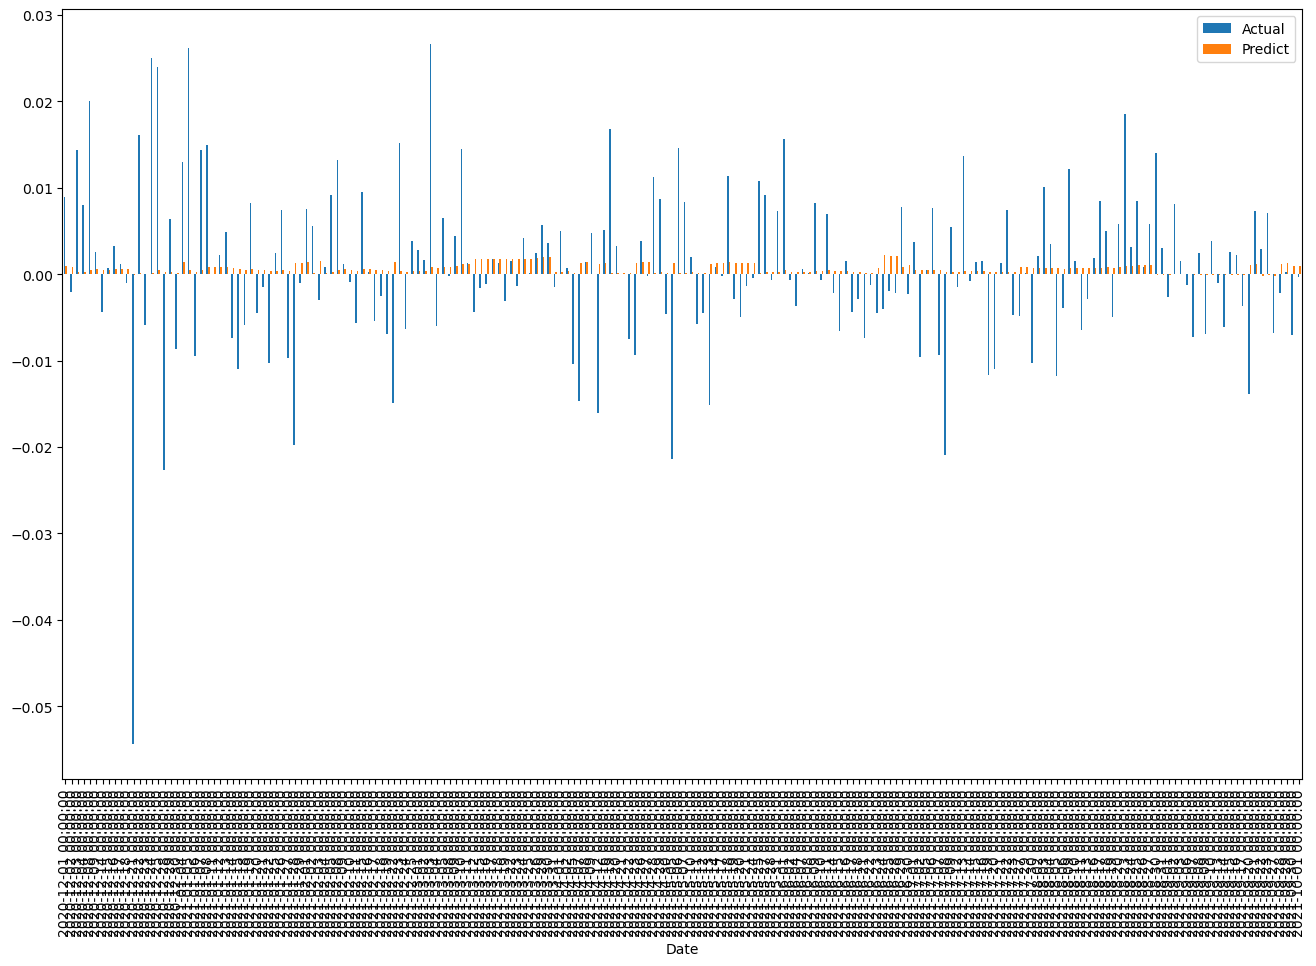

In [420]:
df_live_report_exmaple = df_live_report.head(200)
df_live_report_exmaple.plot(kind='bar',figsize=(16,10))

<AxesSubplot:xlabel='Date'>

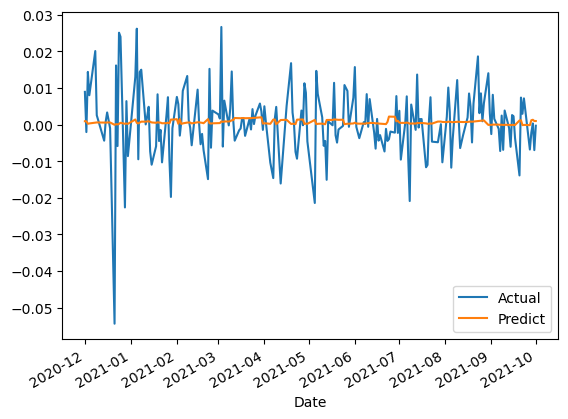

In [421]:
(df_live_report_exmaple).plot()

<AxesSubplot:xlabel='Date'>

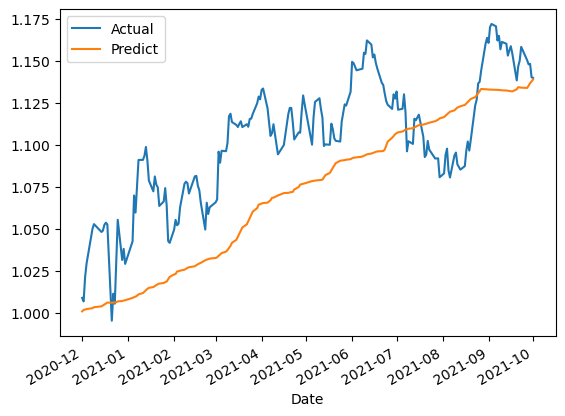

In [422]:
(df_live_report_exmaple+1).cumprod().plot()